In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import analysis as an
from pathlib import Path

project_folder = Path(an.__file__).parent.parent.resolve()

# plt.style.use('seaborn')
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
sns.set_color_codes('deep')
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Connectivity Analysis

## Data loading

In [2]:
data_folder = project_folder / 'data'
results_folder = project_folder / 'results'
results_folder.mkdir(exist_ok=True)
print(f'Storing results in: {results_folder}')
print('Available data paths:')
[x for x in sorted(data_folder.iterdir())]


Storing results in: /home/chwalisz/Code/twist/experiments/walker/results
Available data paths:


[PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2018-01-17-144113'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2018-01-17-192523'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2019-03-13-154819'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2019-03-14-105308'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/outdated')]

In [3]:
df_list = []
for data_path in data_folder.iterdir():
    if not data_path.stem.startswith("2019-03"):
        continue
    print(data_path)
    df_list.append(an.get_iperf_folder(data_path, recursive=True))
    
df = pd.concat(df_list)

df.head()

/home/chwalisz/Code/twist/experiments/walker/data/2019-03-13-154819
/home/chwalisz/Code/twist/experiments/walker/data/2019-03-14-105308


,Throughput [Mbps],bytes,end,jitter ms,lost packets,lost percent,omitted,packets,seconds,socket,start,Client,Access Point,Kernel,Timestamp,System Info,Protocol,Connection,file
0,39240600.0,4907008,1.00039,2.10162,0,0.0,False,599,1.000390,4,0.00000,giga1,giga2,3.18.87-031887-generic,"Wed, 13 Mar 2019 14:49:50 GMT",Linux giga1 3.18.87-031887-generic #2017120918...,UDP,giga1\ngiga2,giga2-giga1
1,44833700.0,5603328,2.00024,1.63781,0,0.0,False,684,0.999842,4,1.00039,giga1,giga2,3.18.87-031887-generic,"Wed, 13 Mar 2019 14:49:50 GMT",Linux giga1 3.18.87-031887-generic #2017120918...,UDP,giga1\ngiga2,giga2-giga1
2,48032600.0,6004736,3.00035,1.68845,0,0.0,False,733,1.000110,4,2.00024,giga1,giga2,3.18.87-031887-generic,"Wed, 13 Mar 2019 14:49:50 GMT",Linux giga1 3.18.87-031887-generic #2017120918...,UDP,giga1\ngiga2,giga2-giga1
3,52039300.0,6504448,4.00028,1.61450,0,0.0,False,794,0.999928,4,3.00035,giga1,giga2,3.18.87-031887-generic,"Wed, 13 Mar 2019 14:49:50 GMT",Linux giga1 3.18.87-031887-generic #2017120918...,UDP,giga1\ngiga2,giga2-giga1
4,54383600.0,6799360,5.00048,1.44712,0,0.0,False,830,1.000210,4,4.00028,giga1,giga2,3.18.87-031887-generic,"Wed, 13 Mar 2019 14:49:50 GMT",Linux giga1 3.18.87-031887-generic #2017120918...,UDP,giga1\ngiga2,giga2-giga1


## Throughput analysis

In [4]:
throughput = df.groupby(['Access Point', 'Client', 'Kernel'])['Throughput [Mbps]'].describe()
throughput

count          mean           std  \
Access Point Client Kernel                                                      
giga1        giga2  3.18.87-031887-generic   60.0  3.800964e+07  2.837227e+06   
                    4.14.5-041405-generic    60.0  7.585141e+07  5.625723e+06   
giga2        giga1  3.18.87-031887-generic   60.0  5.016447e+07  2.968686e+06   
                    4.14.5-041405-generic    60.0  6.785200e+07  2.640811e+06   

                                                   min         25%  \
Access Point Client Kernel                                           
giga1        giga2  3.18.87-031887-generic  31454200.0  36016675.0   
                    4.14.5-041405-generic   59174600.0  71671825.0   
giga2        giga1  3.18.87-031887-generic  39240600.0  48144650.0   
                    4.14.5-041405-generic   57462300.0  66698350.0   

                                                   50%         75%         max  
Access Point Client Kernel                                                      
giga1        giga2  3.18.87-031887-generic  38428850.0  39781550.0  43183800.0  
                    4.14.5-041405-generic   76494850.0  80461425.0  84015200.0  
giga2        giga1  3.18.87-031887-generic  50626850.0  52504400.0  54768800.0  
                    4.14.5-041405-generic   68196500.0  69767525.0  72565000.0

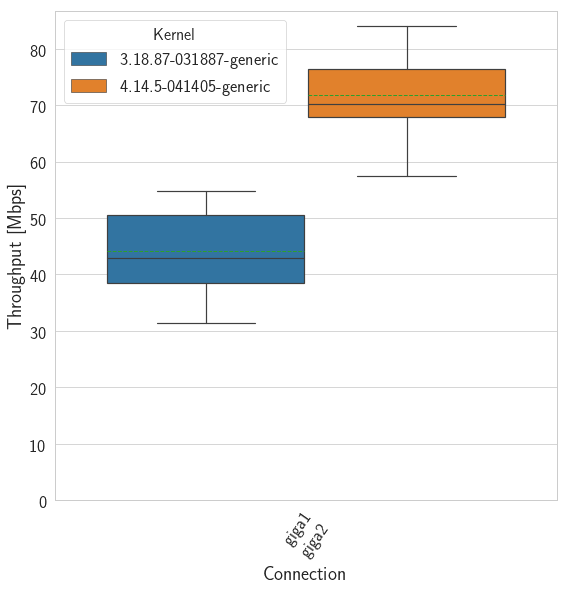

In [5]:
fig, ax = plt.subplots(figsize=(9,9))

sns.boxplot(
    x='Connection',
    y='Throughput [Mbps]',
    hue='Kernel',
    data=df,
    showfliers=True,
    showmeans=True,
    meanline=True,
    order=list(df.groupby('Connection')['Throughput [Mbps]'].describe().sort_values('mean').index),
    hue_order=sorted(df['Kernel'].unique()),
#     split=True,
#     cut=0,
);
ax.set_ylim([0, None])
ax.yaxis.set_major_formatter(an.bitrate_formatter)
plt.xticks(rotation=55)
fig.savefig(str(results_folder / 'throughput_demo.pdf'), transparent=False, bbox_inches='tight')

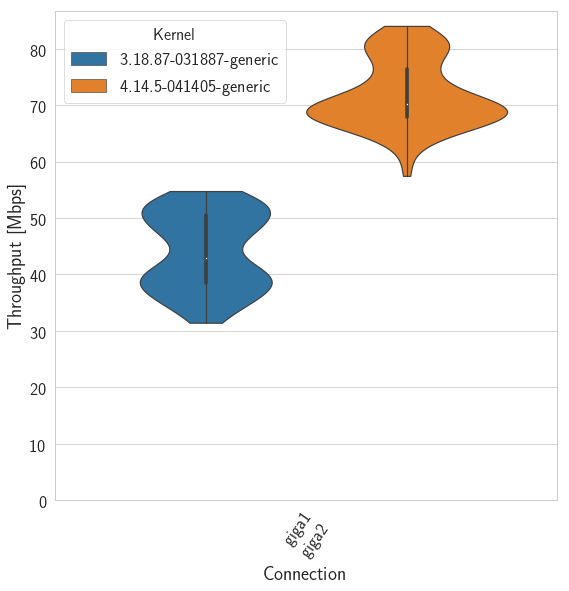

In [6]:
fig, ax = plt.subplots(figsize=(9,9))

sns.violinplot(
    y='Throughput [Mbps]',
    x='Connection',
    hue='Kernel',
    data=df,
    showfliers=False,
#     split=True,
    cut=0,
    order=list(df.groupby('Connection')['Throughput [Mbps]'].describe().sort_values('mean').index),
    hue_order=sorted(df['Kernel'].unique()),
);
ax.set_ylim([0, None])
plt.xticks(rotation=55)
ax.yaxis.set_major_formatter(an.bitrate_formatter)
# ax.xaxis.set_major_formatter(an.bitrate_formatter)

## Kernel comarison

Looking at mean throughput

In [7]:
kernels = pd.pivot_table(
    throughput,
    values='mean',
    index=['Access Point', 'Client'],
    columns='Kernel',
#     aggfunc=np.mean,
)
kernel_comparison = kernels['4.14.5-041405-generic'] / kernels['3.18.87-031887-generic']
kernels

,Kernel,3.18.87-031887-generic,4.14.5-041405-generic
Access Point,Client,,
giga1,giga2,3.800964e+07,7.585141e+07
giga2,giga1,5.016447e+07,6.785200e+07


count    2.000000
mean     1.674087
std      0.454665
min      1.352591
25%      1.513339
50%      1.674087
75%      1.834836
max      1.995584
dtype: float64

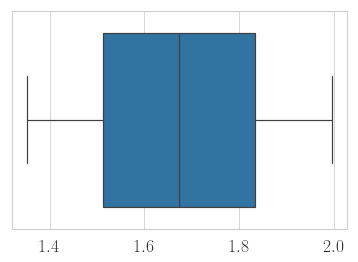

In [8]:
sns.boxplot(kernel_comparison)
kernel_comparison.describe()

Looking and standard deviations

In [9]:
kernel_std = pd.pivot_table(
    throughput,
    values='std',
    index=['Access Point', 'Client'],
    columns='Kernel',
#     aggfunc=np.mean,
)
kernel_std_comp = kernel_std['4.14.5-041405-generic'] / kernel_std['3.18.87-031887-generic']
kernel_std_comp

Access Point  Client
giga1         giga2     1.982824
giga2         giga1     0.889555
dtype: float64

count    2.000000
mean     1.436190
std      0.773058
min      0.889555
25%      1.162873
50%      1.436190
75%      1.709507
max      1.982824
dtype: float64

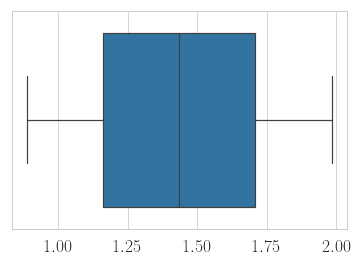

In [10]:
sns.boxplot(kernel_std_comp)
kernel_std_comp.describe()

## Connection investigation

In [11]:
connections = pd.pivot_table(
    df[df['Kernel'] == '4.14.5-041405-generic'],
    values='Throughput [Mbps]',
    index='Access Point',
    columns='Client',
    aggfunc=np.mean,
)
connections = connections * 1e-6
connections

Client,giga1,giga2
Access Point,,
giga1,NaN,75.851412
giga2,67.852002,NaN


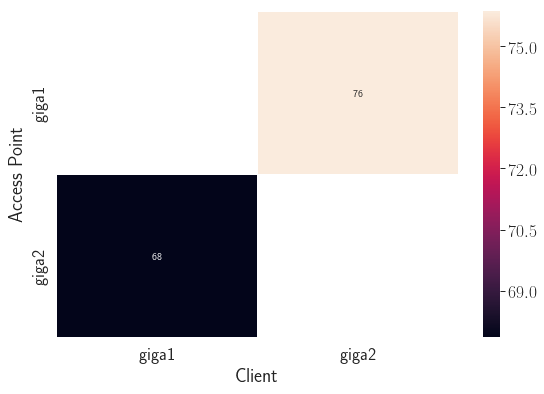

In [12]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(connections, annot=True, linewidths=.5, ax=ax)